# ResNet Preprocessing - Modified for Multiphase Data

Copy this notebook and set the paths to start preprocessing your data.

Note: If you are going to update this notebooks, clear the outputs before committing.

## Imports

In [1]:
import os
import pathlib
import typing
import pandas as pd

import numpy as np

## Load Data

Load in some sample scans. Here we take out 20 positive scans.

In [2]:
def unzip(path):
    """
    unzips one npz file given path of file
    :param path: string path of a singular npz file
    :return: the contents of the zip file
    """
    files = np.load(path)
    return files

In [3]:
# data_dict = load_data('/home/elvo-analysis/data/numpy/')
dir_path = '/research/rih-cs/datasets/elvo-multiphase/v0.1/positive'

In [4]:
samples = []
sample_size = 20
i = 1
for npz_file in os.listdir(dir_path):
    if i > sample_size:
        break
    i += 1
    if npz_file.endswith(".npz"):  # ignore gstmp files
        npy_files = np.load(dir_path + '/' + npz_file)
        for file in npy_files:
            samples.append(npy_files[file])

Check that we have the correct number of scans in our sample. Expected: 20 x 3 = 60 3D numpy arrays in total

In [5]:
print(len(samples))

60


Check the shape of each of these 60 arrays. One key part of this preprocessing pipeline is to make every scan the same shape.

In [26]:
# for scan in samples:
#     print(scan.shape)

print(samples[20].shape)

(984, 197, 180)


In [7]:
# print(samples)

Sample plots to see whether the brain is relatively centered in the scan.

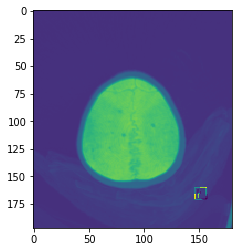

In [30]:
import matplotlib.pyplot as plt
plt.imshow(samples[20][983])
plt.show();

## Create MIPs

Cropping the image, applying mip, etc.

NOTE: We need to tweak this step so we start counting the slices from the TOP of the head, which is originally the greatest index in the array's z-dim. We do this by first 'flipping' the array along the z-dim.

In [71]:
def mip(arr: np.ndarray, start: int, thickness: int) -> np.ndarray:
    "return one MIP given a 3D array and a start index"
    mip = np.copy(arr)
    print(arr.shape)
    mip[100:]
    print(mip.shape)
    return np.amax(mip, axis=0)

def multichan_mip(arr: np.ndarray, start: int, thickness: int) -> np.ndarray:
    "return three MIPS given a 3D array and start index, counted from the TOP of the head"
    start_1 = start + thickness
    start_2 = start_1 + thickness
    
    return mip(arr, start, thickness), mip(arr, start_1, thickness), mip(arr, start_2, thickness)

In [72]:
# test mip function

In [73]:
mip_1, mip_2, mip_3 = multichan_mip(samples[0], 1000, 10)

(1512, 230, 230)
(1512, 230, 230)
(1512, 230, 230)
(1512, 230, 230)
(1512, 230, 230)
(1512, 230, 230)


In [60]:
print(mip_1)

[[-983 -982 -983 ... -981 -984 -986]
 [-980 -980 -982 ... -984 -983 -985]
 [-980 -982 -984 ... -979 -977 -982]
 ...
 [-796 -792 -800 ... -748 -756 -736]
 [-794 -786 -793 ... -763 -744 -756]
 [-773 -767 -791 ... -765 -746 -736]]


In [61]:
np.amax(samples[0], axis=0)

array([[-983, -982, -983, ..., -981, -984, -986],
       [-980, -980, -982, ..., -984, -983, -985],
       [-980, -982, -984, ..., -979, -977, -982],
       ...,
       [-796, -792, -800, ..., -748, -756, -736],
       [-794, -786, -793, ..., -763, -744, -756],
       [-773, -767, -791, ..., -765, -746, -736]], dtype=int16)

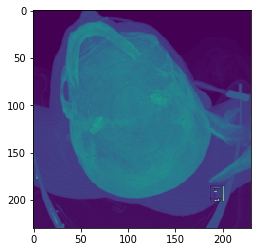

In [47]:
plt.imshow(mip_1)
plt.show();

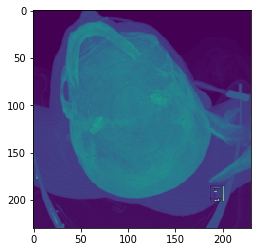

In [44]:
plt.imshow(mip_2)
plt.show();

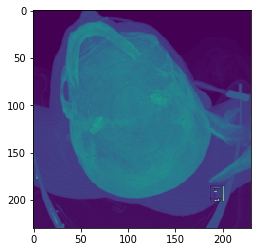

In [45]:
plt.imshow(mip_3)
plt.show();

## Reshape Images

Make all images the same shape after MIPing

In [12]:
import math

def center_crop(arr: np.ndarray, size: tuple) -> np.ndarray:
    """
    crops a numpy array from the center, with equal spacing on edges
    if desired size is greater than array size, pad arrays with zeros
    specifically for 2d scans where only the x- and y-axes need reshaping AFTER MIPing
    """
    arr_size = arr.shape
    assert len(arr_size) == 2  # func intended for only 3d arrays
    assert len(size) == 2
    
    x_val = arr_size[0]
    y_val = arr_size[1]
    x_target = size[0]
    y_target = size[1]
    
    # pad with zeros if needed
#     new_arr = []
#     if x_val < x_target:  # pad x
#         x_pad = math.ceil((x_target - x_val)/2)
#         new_arr = np.pad(arr, ((0, 0), (x_pad, x_pad), (0, 0)), 'constant', constant_values=(0, 0))
#     if y_val < y_target:  # pad y
#         y_pad = math.ceil((y_target - y_val)/2)
#         new_arr = np.pad(new_arr, ((0, 0), (0, 0), (y_pad, y_pad)), 'constant', constant_values=(0, 0))
#     if x_val > x_target:  # crop x
#         x_crop = math.floor((x_val - x_target)/2)
#         new_arr[:,x_crop:-x_crop,:]
#     if y_val > y_target:  # crop x
#         y_crop = math.floor((y_val - y_target)/2)
#         new_arr[:,y_crop:-y_crop,:]
#         print(new_arr)
    
    return new_arr
    

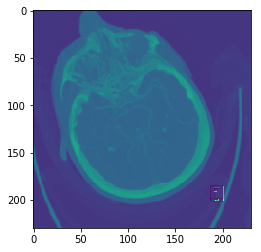

In [13]:
plt.imshow(samples[0][900])
plt.show();

In [14]:
plt.imshow(center_crop(samples[0], (1512, 200, 200))[900])
plt.show();

TypeError: list indices must be integers or slices, not tuple

In [72]:
one_sample = samples[17][300]
reshaped_sample = np.copy(one_sample)
# z_val = (one_sample.shape)[0]
print(one_sample)
# print(z_val)

[[ -993  -990  -992 ...  -989  -983  -987]
 [ -989  -993  -984 ...  -983  -989  -986]
 [ -984  -982  -988 ...  -991  -988  -990]
 ...
 [  287   492   473 ...  -978 -1004  -970]
 [  154   495   432 ...  -946  -975  -940]
 [   35   455   450 ...  -938  -933  -842]]


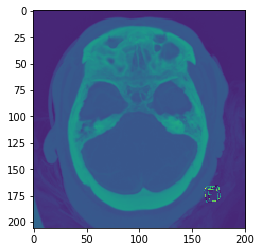

In [73]:
plt.imshow(one_sample)
plt.show();

In [74]:
reshaped_sample.resize((200, 200))

In [75]:
print(one_sample)

[[ -993  -990  -992 ...  -989  -983  -987]
 [ -989  -993  -984 ...  -983  -989  -986]
 [ -984  -982  -988 ...  -991  -988  -990]
 ...
 [  287   492   473 ...  -978 -1004  -970]
 [  154   495   432 ...  -946  -975  -940]
 [   35   455   450 ...  -938  -933  -842]]


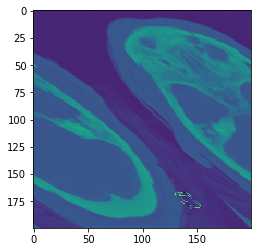

In [76]:
plt.imshow(reshaped_sample)
plt.show();

In [ ]:
reshaped_samples = []

for scan in samples:
    reshaped_samples.append(reshaped_samples)
    

## Visualize

In [109]:
%matplotlib inline

from matplotlib import pyplot as plt

def plot_images(data: typing.List[np.ndarray],
                num_cols: int,
                limit=20,
                offset=0):
    # Ceiling function of len(data) / num_cols
    num_rows = (min(len(data), limit) + num_cols - 1) // num_cols 
    fig = plt.figure(figsize=(10, 10))
    for i, scan in enumerate(data):
        if i < offset:
            continue
        if i >= offset + limit:
            break
        plot_num = i - offset + 1
        ax = fig.add_subplot(num_rows, num_cols, plot_num)
        plt.imshow(scan[0])
    fig.tight_layout()
    plt.plot()

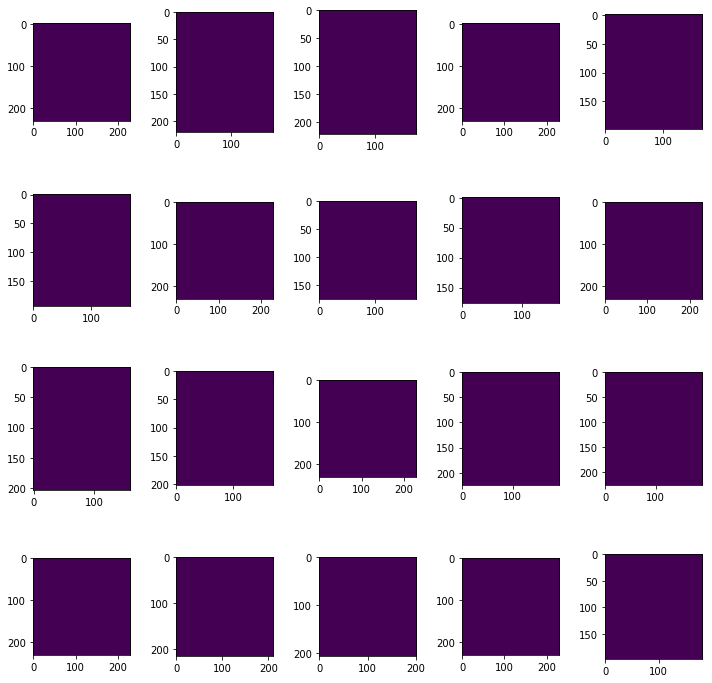

In [110]:
plot_images(mips, num_cols=5)